# Lab 4: Visualizing Distributions of IMDB Title Ratings


# HW3 Challenge Question

Sort the rows of `flights` such that the months are arranged in the following order: spring, summer, fall, winter. (Here we define winter to be January-March, spring is April-June, etc.) Within each season, the months should be sorted in ascending order. After sorting, drop all columns except for month, day and tail number. Store the sorted and subsetted table in a variable called `season`. _2 points_

In [1]:
install.packages("nycflights13")

Installing package into ‘/Library/Frameworks/R.framework/Versions/4.0/Resources/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/l0/31_4cwqj0sv98vlcftj06r1r0000gr/T//RtmpSyAUQ4/downloaded_packages


In [2]:
library(nycflights13)

A few of you realized that constructing the seasons variable can be easily done using the ```case_when``` function from dplyr. ```case_when``` lets you construct a single variable from multiple if-else statements.

In [161]:
print(flights)

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# … with 336,766 more rows,

In [165]:
flights_with_seasons <- mutate(flights, season=case_when(
    between(month, 4, 6) ~ "Spring",
    between(month, 7,9) ~ "Summer",
    between(month, 10, 12) ~ "Fall",
    between(month, 1, 3) ~ "Winter"
)) %>%
    select(season, month, everything())
print(flights_with_seasons)

# A tibble: 336,776 x 20
   season month  year   day dep_time sched_dep_time dep_delay arr_time
   <chr>  <int> <int> <int>    <int>          <int>     <dbl>    <int>
 1 Winter     1  2013     1      517            515         2      830
 2 Winter     1  2013     1      533            529         4      850
 3 Winter     1  2013     1      542            540         2      923
 4 Winter     1  2013     1      544            545        -1     1004
 5 Winter     1  2013     1      554            600        -6      812
 6 Winter     1  2013     1      554            558        -4      740
 7 Winter     1  2013     1      555            600        -5      913
 8 Winter     1  2013     1      557            600        -3      709
 9 Winter     1  2013     1      557            600        -3      838
10 Winter     1  2013     1      558            600        -2      753
# … with 336,766 more rows, and 12 more variables: sched_arr_time <int>,
#   arr_delay <dbl>, carrier <chr>, flight <int>, 

Next we need to establish an order in the season variable. This can be done by making it into a factor variable.

In [169]:
flights_with_seasons_ordered <- mutate(flights_with_seasons, 
                                       season=factor(season, 
                                                     levels=c("Spring", "Summer", "Fall", "Winter"), 
                                                     ordered=TRUE)) %>%
    arrange(season, month)
print(flights_with_seasons_ordered)

# A tibble: 336,776 x 20
   season month  year   day dep_time sched_dep_time dep_delay arr_time
   <ord>  <int> <int> <int>    <int>          <int>     <dbl>    <int>
 1 Spring     4  2013     1      454            500        -6      636
 2 Spring     4  2013     1      509            515        -6      743
 3 Spring     4  2013     1      526            530        -4      812
 4 Spring     4  2013     1      534            540        -6      833
 5 Spring     4  2013     1      542            545        -3      914
 6 Spring     4  2013     1      543            545        -2      921
 7 Spring     4  2013     1      551            600        -9      748
 8 Spring     4  2013     1      552            600        -8      641
 9 Spring     4  2013     1      553            600        -7      725
10 Spring     4  2013     1      554            600        -6      752
# … with 336,766 more rows, and 12 more variables: sched_arr_time <int>,
#   arr_delay <dbl>, carrier <chr>, flight <int>, 

Finally we pare down the dataset to the columns requested by the prompt.

In [171]:
season <- select(flights_with_seasons_ordered, month, day, tailnum)
print(season)

# A tibble: 336,776 x 3
   month   day tailnum
   <int> <int> <chr>  
 1     4     1 N566UW 
 2     4     1 N76288 
 3     4     1 N76517 
 4     4     1 N5DSAA 
 5     4     1 N784JB 
 6     4     1 N590JB 
 7     4     1 N737US 
 8     4     1 N750UW 
 9     4     1 N510MQ 
10     4     1 N723EV 
# … with 336,766 more rows


# Visualizing IMDB Movie Ratings

Original source: https://www.imdb.com/interfaces/

In [3]:
library(tidyverse)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In many cases, you can read compressed files directly with the ```read_*``` family of functions in tidyverse.

In [4]:
ratings <- read_tsv('https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab4/title.ratings.tsv.gz')

Parsed with column specification:
cols(
  tconst = col_character(),
  averageRating = col_double(),
  numVotes = col_double()
)



In [153]:
print(ratings)

# A tibble: 1,077,114 x 3
   tconst    averageRating numVotes
   <chr>             <dbl>    <dbl>
 1 tt0000001           5.6     1647
 2 tt0000002           6.1      198
 3 tt0000003           6.5     1349
 4 tt0000004           6.2      120
 5 tt0000005           6.2     2137
 6 tt0000006           5.3      115
 7 tt0000007           5.5      655
 8 tt0000008           5.4     1816
 9 tt0000009           5.9      155
10 tt0000010           6.9     6034
# … with 1,077,104 more rows


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



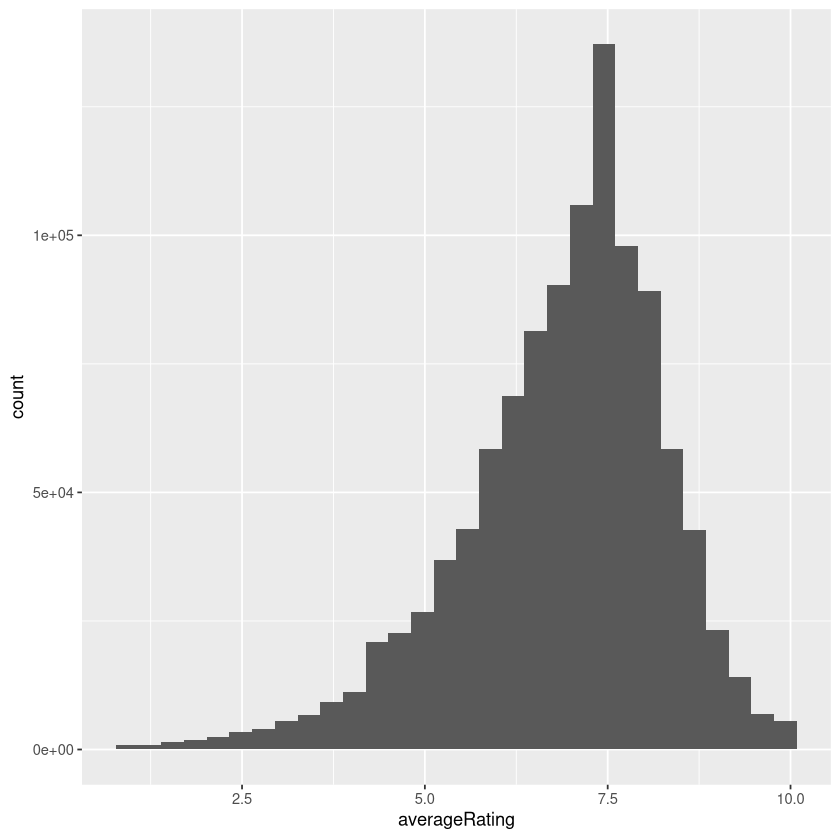

In [154]:
ggplot(ratings) + geom_histogram(aes(x=averageRating))

What can we say about the distribution ratings?

-  The peak is around 7.5
-  The distribution is skewed left

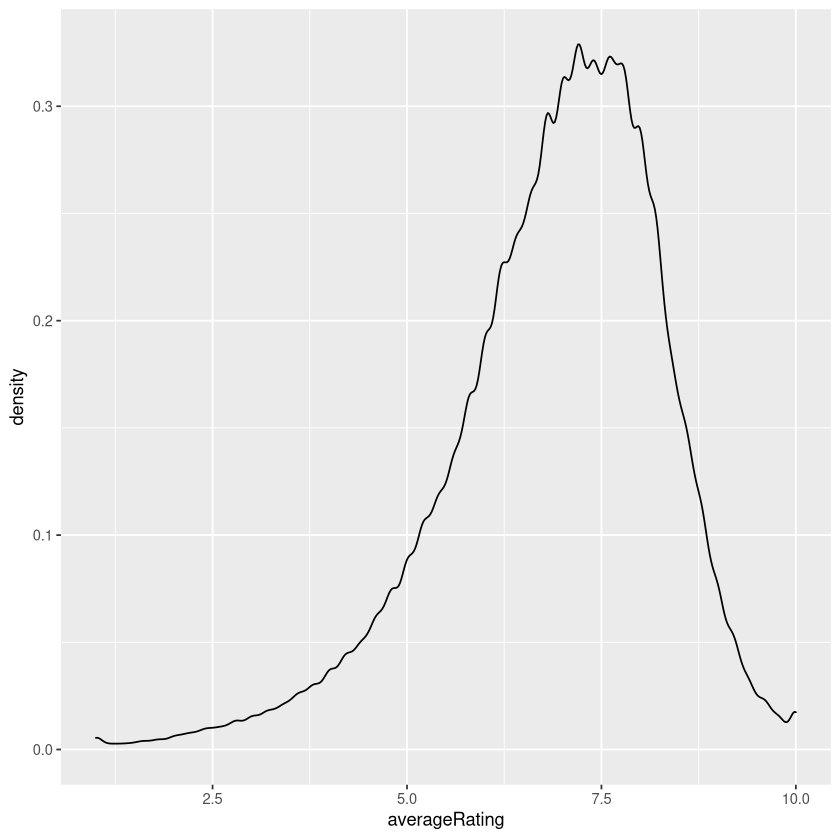

In [9]:
ggplot(ratings) + geom_density(aes(x=averageRating))

geom_density estimates the probability density function of your data. It relies on a smoothing parameter called the "bandwidth". If you select a higher bandwidth, the result will be smoother, but may discard local features. You can see what the default choice of bandwidth is by looking in the documentation.

In [5]:
?geom_density
?stats::bw.nrd0

In [15]:
default_bw = stats::bw.nrd0(ratings$averageRating)
default_bw

[1] 0.07097972

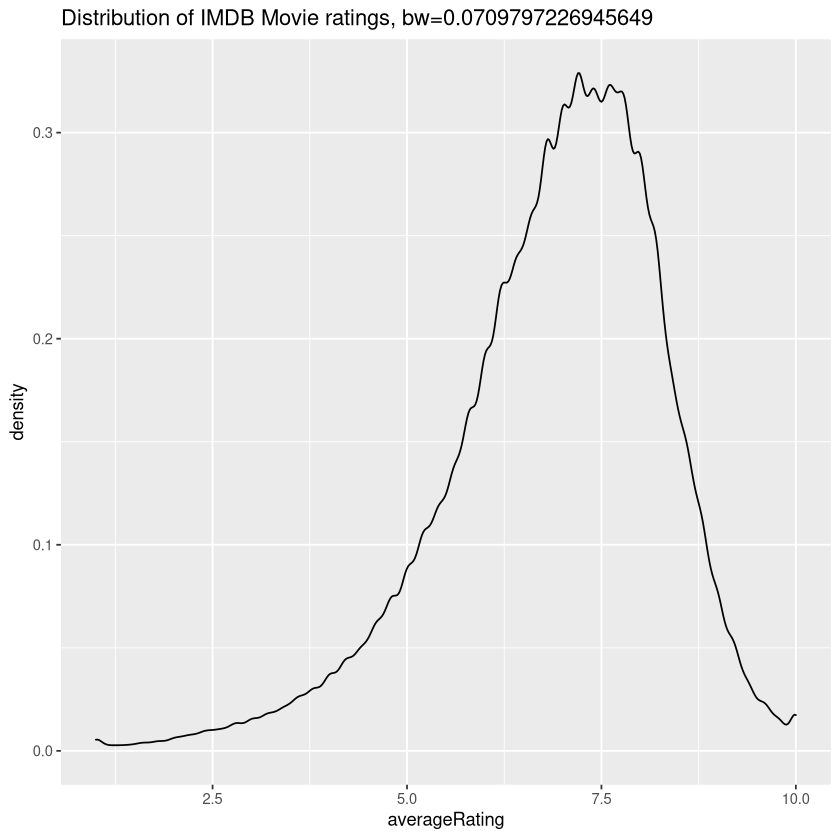

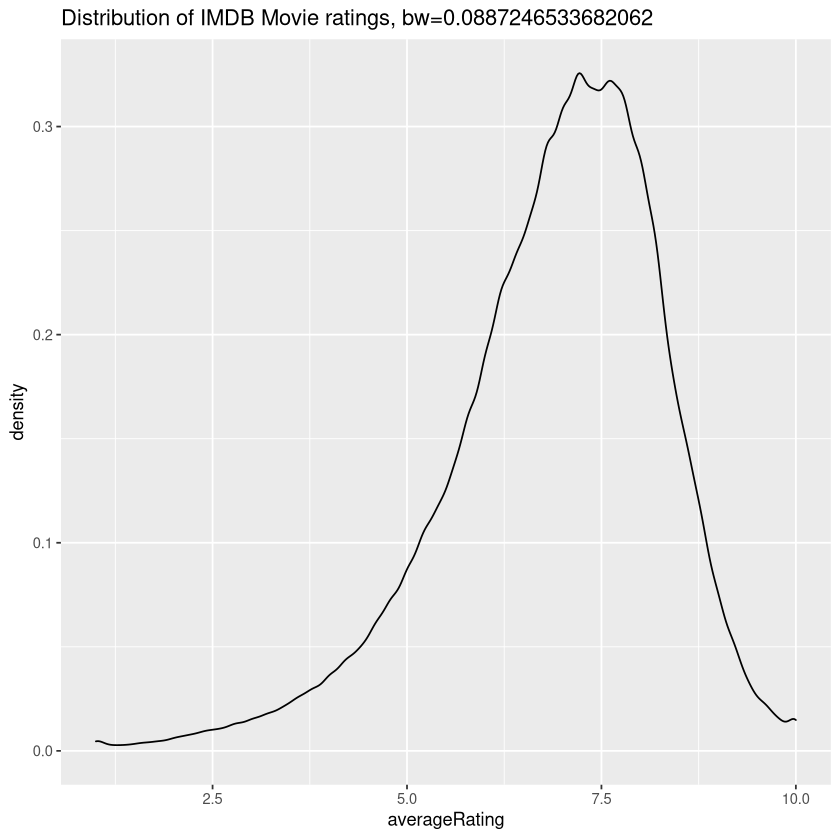

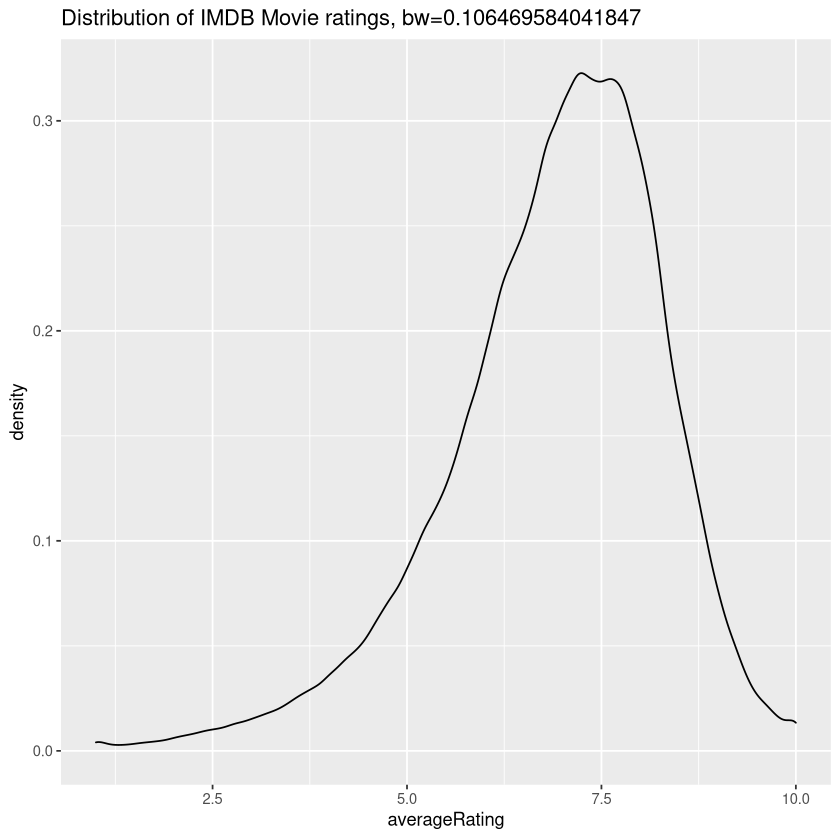

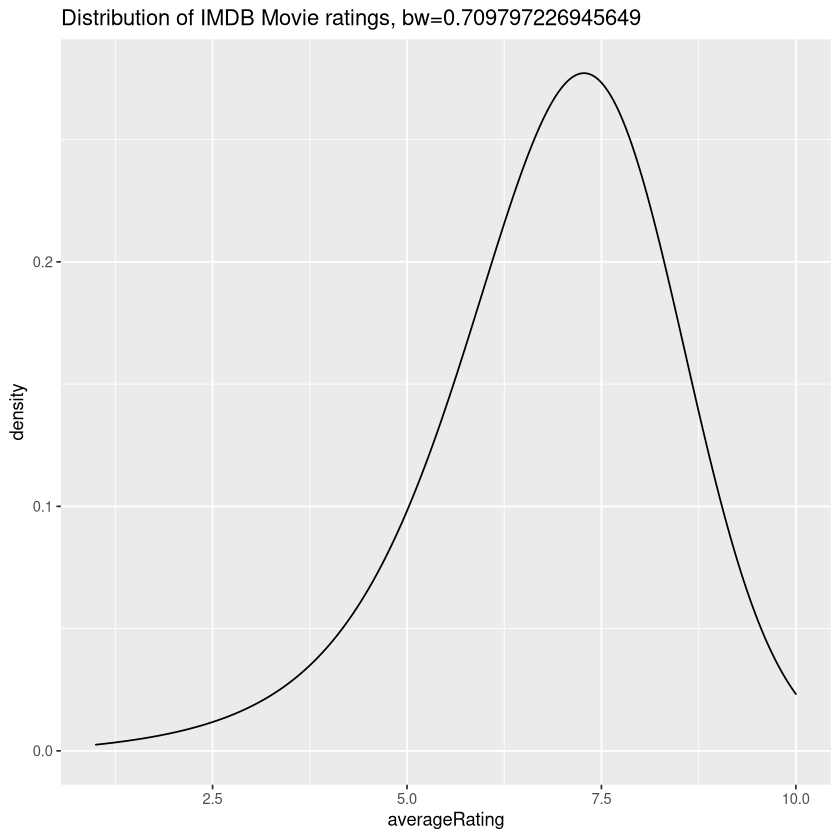

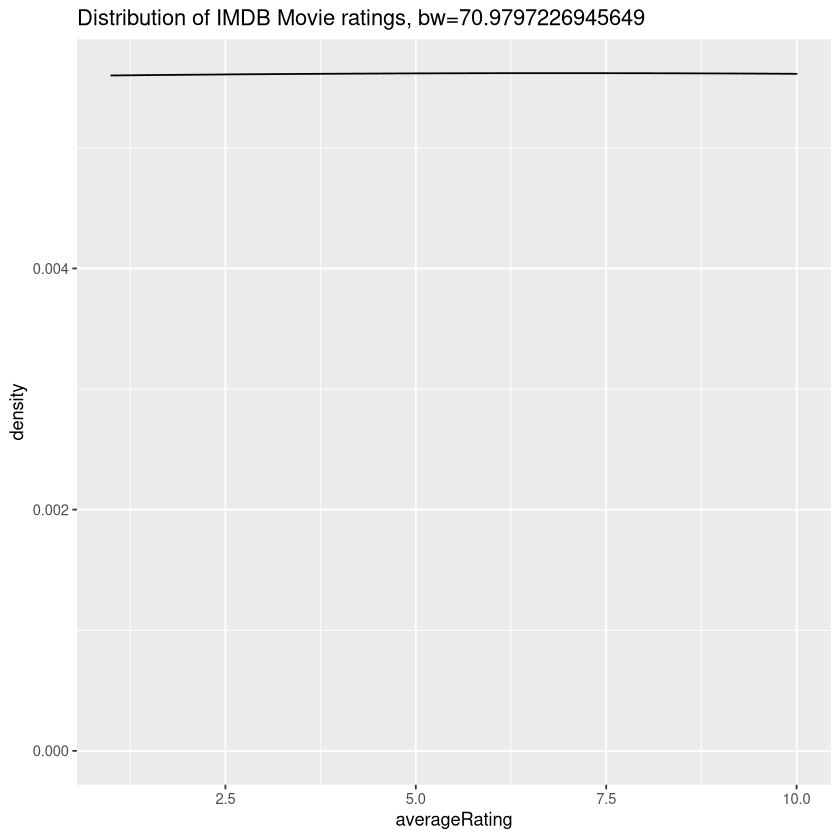

In [32]:
multipliers = c(1,1.25, 1.5, 10, 1000)
for(m in multipliers) {
    g <- ggplot(ratings) + 
        geom_density(aes(x=averageRating), bw=m*default_bw) + 
        ggtitle(paste0("Distribution of IMDB Movie ratings, bw=", m*default_bw))
    plot(g)
}

In [33]:
#principals <- read_tsv('https://datasets.imdbws.com/title.principals.tsv.gz')

Parsed with column specification:
cols(
  tconst = col_character(),
  ordering = col_double(),
  nconst = col_character(),
  category = col_character(),
  job = col_character(),
  characters = col_character()
)

Warning message:
“1256827 parsing failures.
  row col           expected actual                        file
30687 job delimiter or quote      , './title.principals.tsv.gz'
30687 job delimiter or quote      T './title.principals.tsv.gz'
30687 job delimiter or quote      ] './title.principals.tsv.gz'
30687 job delimiter or quote      S './title.principals.tsv.gz'
30687 job delimiter or quote      ] './title.principals.tsv.gz'
..... ... .................. ...... ...........................
See problems(...) for more details.
”


In [35]:
print(principals)

# A tibble: 40,139,919 x 6
   tconst    ordering nconst    category       job                   characters 
   <chr>        <dbl> <chr>     <chr>          <chr>                 <chr>      
 1 tt0000001        1 nm1588970 self           "\\N"                 "[\"Self\"…
 2 tt0000001        2 nm0005690 director       "\\N"                 "\\N"      
 3 tt0000001        3 nm0374658 cinematograph… "director of photogr… "\\N"      
 4 tt0000002        1 nm0721526 director       "\\N"                 "\\N"      
 5 tt0000002        2 nm1335271 composer       "\\N"                 "\\N"      
 6 tt0000003        1 nm0721526 director       "\\N"                 "\\N"      
 7 tt0000003        2 nm5442194 producer       "producer"            "\\N"      
 8 tt0000003        3 nm1335271 composer       "\\N"                 "\\N"      
 9 tt0000003        4 nm5442200 editor         "\\N"                 "\\N"      
10 tt0000004        1 nm0721526 director       "\\N"                 "\\N"      
#

In [40]:
library(stringi)

Suppose we want to compare the two greatest actors of our generation:

![nic](https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab4/nic.jpg) ![leo](https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab4/leo.jpg)

The dataset containing all actors and characters is really large, so I ran this code to generate a table which will tell us if Nicolas Cage or Leonardo DiCaprio were in a movie, and saved it to "greatest_actors.csv.gz". Note that write_csv will automatically compress the output if we have ".gz" as the extension.

```
greatest_actors <- principals %>% 
    mutate(actor=case_when(
        nconst=="nm0000115"~"Nicolas Cage",
        nconst=="nm0000138"~"Leonardo DiCaprio",
        TRUE~"Somebody else"
    )) %>%
    group_by(tconst) %>%
    summarize(has_nic=any(nconst=="nm0000115"), has_leo=any(nconst=="nm0000138"))
write_csv(greatest_actors, "greatest_actors.csv.gz")
```

In [155]:
greatest_actors <- read_csv("https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab4/greatest_actors.csv.gz")

Parsed with column specification:
cols(
  tconst = col_character(),
  has_nic = col_logical(),
  has_leo = col_logical()
)



In [135]:
print(greatest_actors)

# A tibble: 6,344,650 x 3
   tconst    has_nic has_leo
   <chr>     <lgl>   <lgl>  
 1 tt0000001 FALSE   FALSE  
 2 tt0000002 FALSE   FALSE  
 3 tt0000003 FALSE   FALSE  
 4 tt0000004 FALSE   FALSE  
 5 tt0000005 FALSE   FALSE  
 6 tt0000006 FALSE   FALSE  
 7 tt0000007 FALSE   FALSE  
 8 tt0000008 FALSE   FALSE  
 9 tt0000009 FALSE   FALSE  
10 tt0000010 FALSE   FALSE  
# … with 6,344,640 more rows


We now join this table to our ratings table via the title identifier "tconst"

In [136]:
ratings_actors <- inner_join(ratings, greatest_actors, by="tconst")

In [137]:
print(ratings_actors)

# A tibble: 1,033,078 x 5
   tconst    averageRating numVotes has_nic has_leo
   <chr>             <dbl>    <dbl> <lgl>   <lgl>  
 1 tt0000001           5.6     1647 FALSE   FALSE  
 2 tt0000002           6.1      198 FALSE   FALSE  
 3 tt0000003           6.5     1349 FALSE   FALSE  
 4 tt0000004           6.2      120 FALSE   FALSE  
 5 tt0000005           6.2     2137 FALSE   FALSE  
 6 tt0000006           5.3      115 FALSE   FALSE  
 7 tt0000007           5.5      655 FALSE   FALSE  
 8 tt0000008           5.4     1816 FALSE   FALSE  
 9 tt0000009           5.9      155 FALSE   FALSE  
10 tt0000010           6.9     6034 FALSE   FALSE  
# … with 1,033,068 more rows


A nifty use of the "case_when" function lets us construct a single variable, "cast", which will categorize movies into four groups:
-  Has Nicolas Cage ("Nic"), but not Leonardo DiCaprio ("Leo")
-  Has Leo, but not Nic
-  Has both Leo and Nic
-  Has neither Leo nor Nic

In [143]:
ratings_nic_vs_leo <- ratings_actors %>%
    mutate(cast = case_when(
        has_nic & !has_leo  ~ "nic_only",
        !has_nic & has_leo  ~ "leo_only",
        has_nic & has_leo   ~ "both",
        !has_nic & !has_leo ~ "neither")) %>%
    mutate(cast = as.factor(cast)) %>%
    filter(numVotes > 10000)

Let's look at the ratings of movies with Leonardo DiCaprio vs movies without him.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



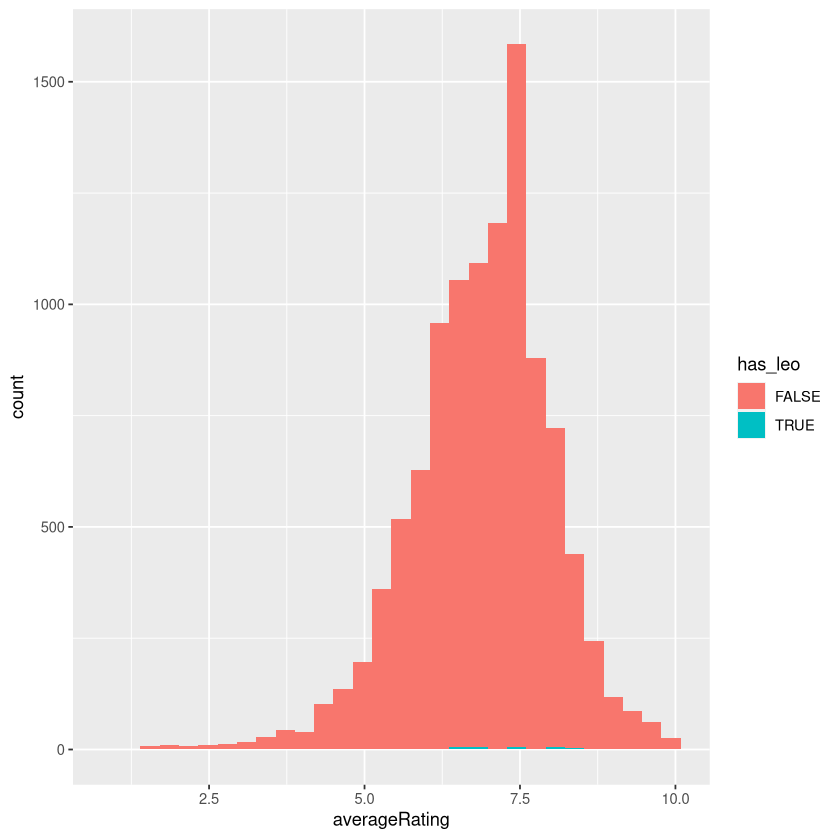

In [173]:
ggplot(ratings_nic_vs_leo, aes(x=averageRating, fill=has_leo, group=has_leo)) + geom_histogram()

Wait, what happened? Since the y-axis is count, the number of movies with Leo in them is dwarfed by the number of total titles in the dataset. Even the most prolific actors can't star in that many movies.

There's a way to fix the histogram to be proportional and compare groups; this is left as an exercise.

Instead, we can use geom_density to compare the distribution of a variable between different groups.

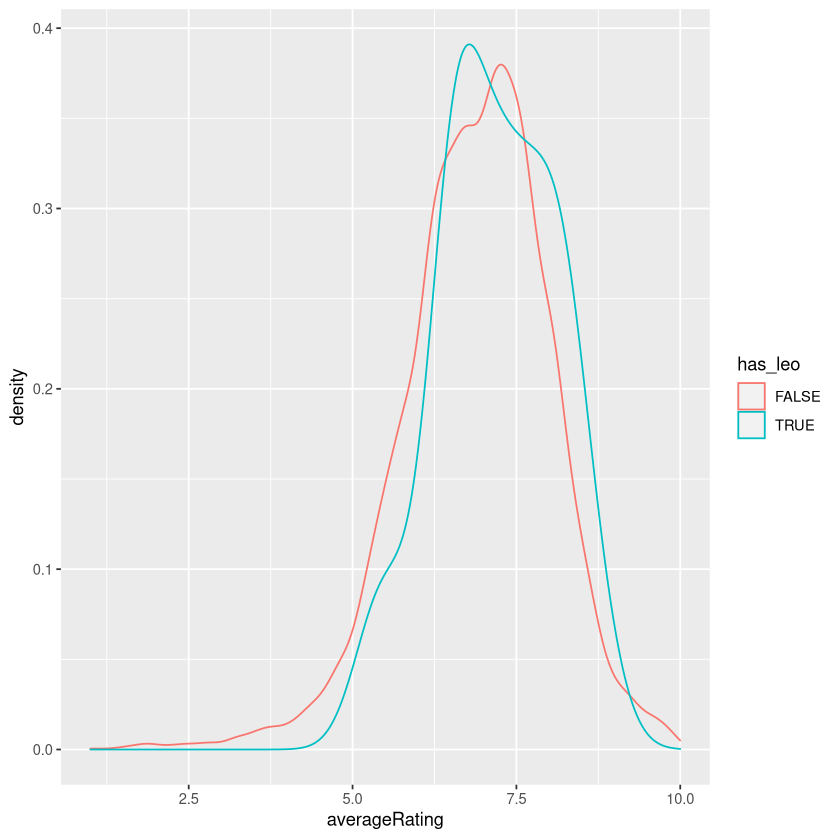

In [144]:
ggplot(ratings_nic_vs_leo, aes(x=averageRating, color=has_leo, group=has_leo)) + geom_density()

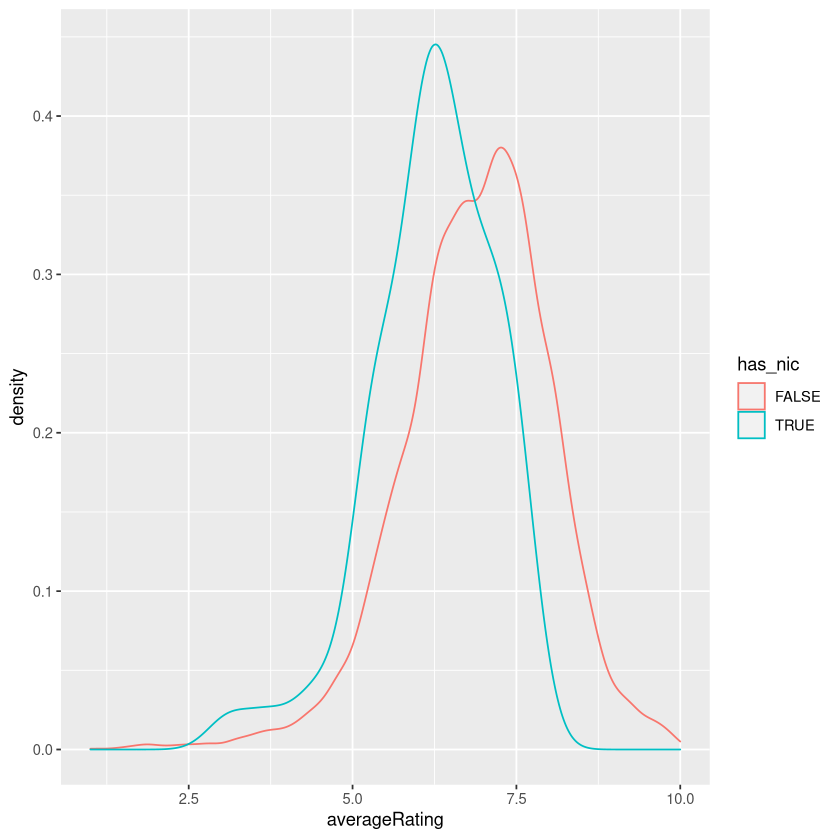

In [140]:
ggplot(ratings_nic_vs_leo, aes(x=averageRating, color=has_nic, group=has_nic)) + geom_density()

We can look at the distributions of all four of our groups. Note that this gets a bit messy and hard to read.

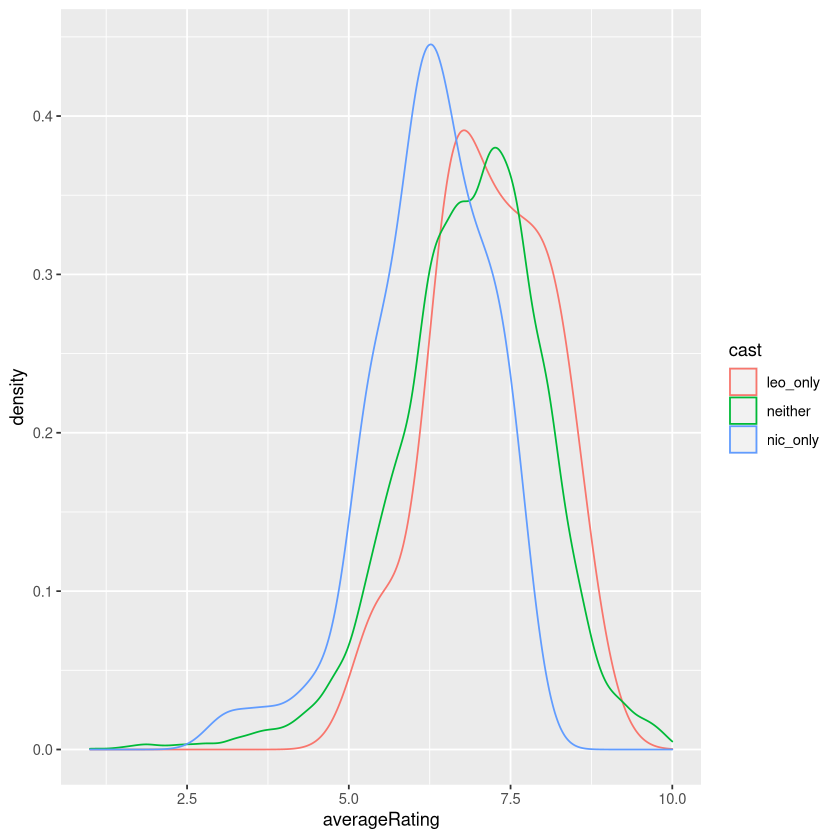

In [146]:
ggplot(ratings_nic_vs_leo, aes(x=averageRating, color=cast, group=cast)) + geom_density()

The "geom_boxplot" function is another handy way to visualize distributions. It is arguably more foolproof than geom_density because it directly plots the quartiles of distributions. It also makes it easier to visually compare many distributions

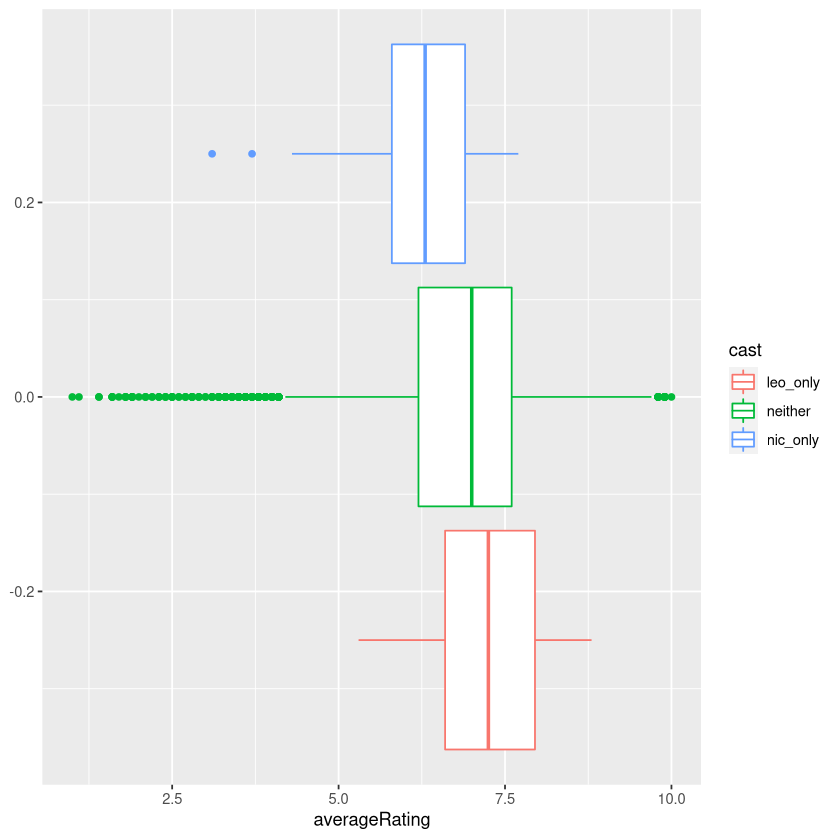

In [145]:
ggplot(ratings_nic_vs_leo, aes(x=averageRating, color=cast, group=cast)) + geom_boxplot()

Here we see that Nic does generally worse in his movie ratings than Leo. Moreover, Nic has been in some particularly low-rated titles, shown by the outlier dots.

The summary statistics for each group can be seen here:

In [151]:
ratings_nic_vs_leo %>%
    group_by(cast) %>%
    summarize(
        worst=min(averageRating),
        q25=quantile(averageRating, 0.25),
        q50=quantile(averageRating, 0.50),
        q75=quantile(averageRating, 0.75),
        best=max(averageRating))

cast,worst,q25,q50,q75,best
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
leo_only,5.3,6.6,7.25,7.95,8.8
neither,1.0,6.2,7.00,7.60,10.0
nic_only,3.1,5.8,6.30,6.90,7.7
